In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")
import levenberg_marquardt
from matplotlib.pyplot import figure
import heston
from importlib import reload
reload(heston)
from heston import calibrate_heston
import datetime
import matplotlib.dates as mdates
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv(f"../datasets/deribit_options_chain_2022-12-01_OPTIONS.csv")
df = df.drop(columns = ["exchange", "open_interest", 
                    "last_price", "bid_price", "bid_amount", "bid_iv",
                           "ask_price", "ask_amount", "ask_iv", "underlying_index",
                           "delta", "gamma", "vega", "theta" ,"rho"])
currency = "ETH"
ind = [symbol.startswith(currency) for symbol in df.symbol]
df = df[ind].reset_index(drop=True)

In [135]:
df.head()

,symbol,timestamp,local_timestamp,type,strike_price,expiration,mark_price,mark_iv,underlying_price
0,ETH-9DEC22-1400-C,1669852800002000,1669852800011631,call,1400,1670572800000000,0.0146,69.75,1294.5900
1,ETH-16DEC22-1300-P,1669852800011000,1669852800014218,put,1300,1671177600000000,0.0632,74.51,1294.5233
2,ETH-16DEC22-1500-C,1669852800010000,1669852800017777,call,1500,1671177600000000,0.0140,73.44,1294.5233
3,ETH-30DEC22-1400-P,1669852800013000,1669852800018794,put,1400,1672387200000000,0.1325,72.78,1294.2700
4,ETH-2DEC22-1300-C,1669852800013000,1669852800019006,call,1300,1669968000000000,0.0147,69.18,1294.4500


In [172]:
start_params

array([3.  , 0.1 , 0.25, 0.01, 0.08])

In [170]:
calibrated_params, first_error = calibrate_heston(df = df, start_params = start_params, calibration_type="test")
calibrated_params

market [2.55238000e+00 8.93326000e-01 8.93347000e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00813820e+01 5.10462280e+00
 2.93510567e+00 1.65900618e+00 1.14854274e+00 6.38079300e-01
 1.27615860e-01 3.53338430e+01 1.88821360e+01 9.95139600e+00
 5.74110000e+00 3.82740000e+00 1.53098400e+00 8.93053000e-01
 3.82746000e-01 1.27580000e-01 6.19939996e+01 4.22222508e+01
 2.85733661e+01 1.87512715e+01 1.21181686e+01 6.12286416e+00
 2.16851439e+00 8.92917690e-01 8.92917690e-01 7.85648433e+01
 5.81583905e+01 4.25984702e+01 2.23195578e+01 1.21163313e+01
 4.84653254e+00 2.16818561e+00 1.14786297e+00 8.92782310e-01
 9.29642670e+01 5.49512070e+01 3.20025000e+01 1.91284500e+01
 1.23697310e+01 8.28886500e+00 6.75861300e+00 5.10084000e+00
 3.82563000e+00 3.18807500e+00 2.16785700e+00 1.78532200e+00
 1.27523000e+00 8.92640000e-01 7.65126000e-01 3.82563000e-01
 2.55042000e-01 2.55042000e-01 2.55046000e-01 1.27521000e-01
 0.00000000e+00 0

array([ 3.        ,  1.1752318 ,  5.36229505, -0.37471684,  0.68934081])

In [171]:
calibrated_params, first_error = calibrate_heston(df = df, start_params = start_params, calibration_type="all")
calibrated_params

market [2.55238000e+00 8.93326000e-01 8.93347000e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00813820e+01 5.10462280e+00
 2.93510567e+00 1.65900618e+00 1.14854274e+00 6.38079300e-01
 1.27615860e-01 3.53338430e+01 1.88821360e+01 9.95139600e+00
 5.74110000e+00 3.82740000e+00 1.53098400e+00 8.93053000e-01
 3.82746000e-01 1.27580000e-01 6.19939996e+01 4.22222508e+01
 2.85733661e+01 1.87512715e+01 1.21181686e+01 6.12286416e+00
 2.16851439e+00 8.92917690e-01 8.92917690e-01 7.85648433e+01
 5.81583905e+01 4.25984702e+01 2.23195578e+01 1.21163313e+01
 4.84653254e+00 2.16818561e+00 1.14786297e+00 8.92782310e-01
 9.29642670e+01 5.49512070e+01 3.20025000e+01 1.91284500e+01
 1.23697310e+01 8.28886500e+00 6.75861300e+00 5.10084000e+00
 3.82563000e+00 3.18807500e+00 2.16785700e+00 1.78532200e+00
 1.27523000e+00 8.92640000e-01 7.65126000e-01 3.82563000e-01
 2.55042000e-01 2.55042000e-01 2.55046000e-01 1.27521000e-01
 0.00000000e+00 0

array([ 0.17092677,  7.25311292,  3.23021918, -0.3972674 ,  0.64442593])

In [165]:
# calibrate base
number_of_dots = 20
kappas, nu_bars, sigmas, rhos, nu0s, errors = [], [], [], [], [], []
a = np.float64(3.0)  # kappa                     |  mean reversion rate | kappa (Article) | kappa (Roland's)
b = np.float64(0.1)  # v_infinity                |  long term variance | nu_bar           | alpha_bar 
c = np.float64(0.25)  # sigma                    |  volatility of volatility | sigma      | mu
rho = np.float64(0.01)  # rho                    |  correlation between spot and vol |rho | rho
v0 = np.float64(0.08) # init variance            | initial variance | nu_0                | alpha_0
start_params = np.array([a, b, c, rho, v0])
print("Optimize first params with random start once")
calibrated_params, first_error = calibrate_heston(df = df, start_params = start_params, calibration_type="test")

# Get ticks with similar distnce from available data
timestamps = np.linspace(df.timestamp.min(), df.timestamp.max(), number_of_dots)
for timestamp in tqdm(timestamps):
    calibrated_params, error = calibrate_heston(df = df, start_params = calibrated_params, timestamp = timestamp,
                                                calibration_type="test")
    kappas.append(calibrated_params[0])
    nu_bars.append(calibrated_params[1])
    sigmas.append(calibrated_params[2])
    rhos.append(calibrated_params[3])
    nu0s.append(calibrated_params[4])
    errors.append(error)
    
timestamps_hm = [datetime.datetime.fromtimestamp(x/1000000.0) for x in timestamps]

Optimize first params with random start once


  0%|          | 0/20 [00:00<?, ?it/s]

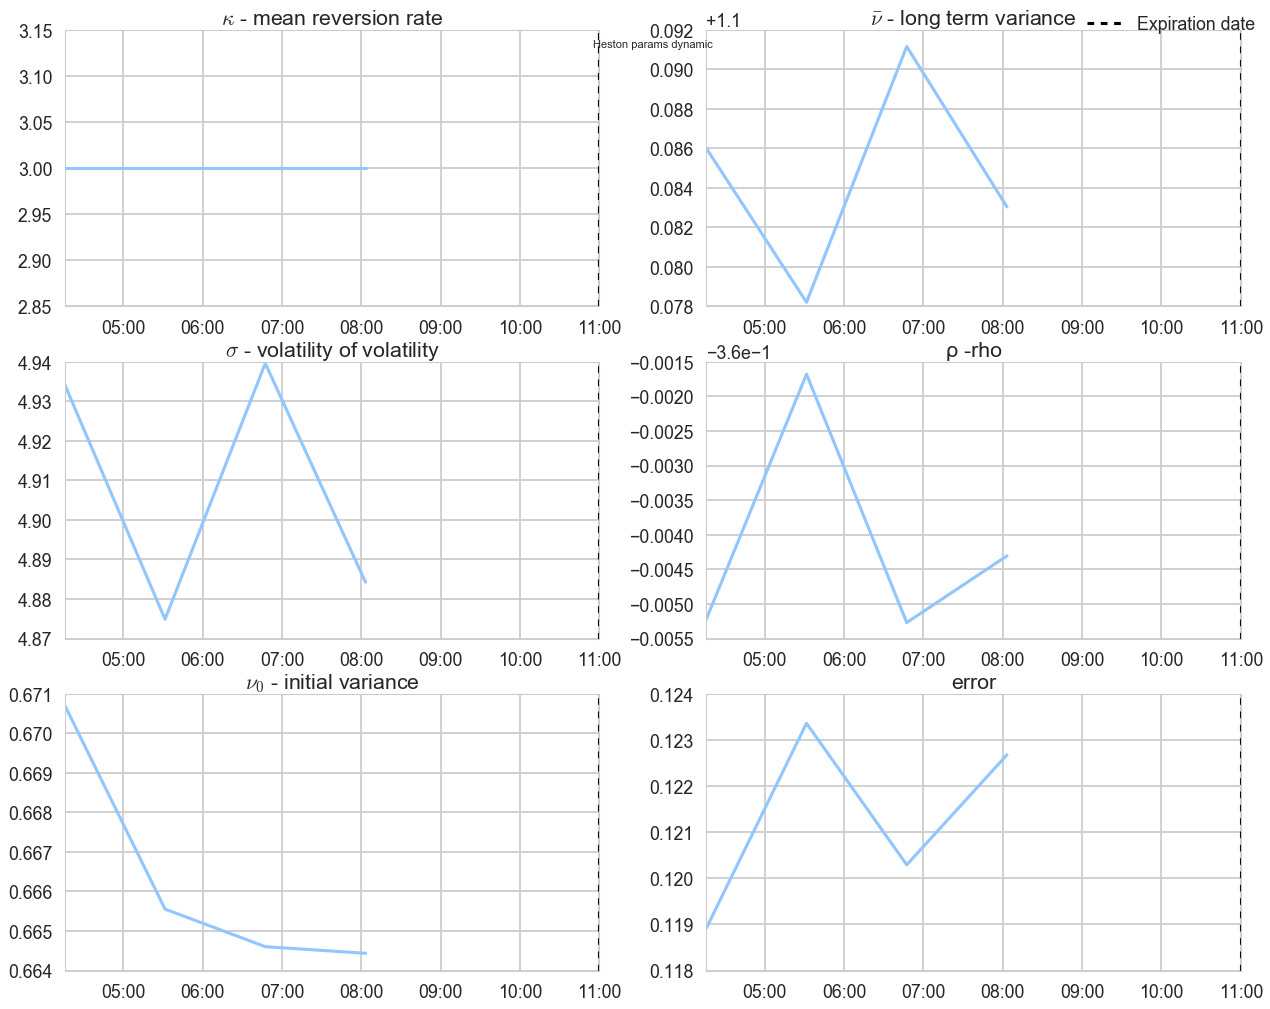

In [166]:
fig, axs =  plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
exp = datetime.datetime(2022, 12, 1, 11, 0, 0, 0 )


axs[0, 0].plot(timestamps_hm[1:-15], kappas[1:-15])
axs[0, 0].set_title(r"$\kappa$ - mean reversion rate")

axs[0, 1].plot(timestamps_hm[1:-15], nu_bars[1:-15])
axs[0, 1].set_title(r"$\bar{\nu}$ - long term variance")

axs[1, 0].plot(timestamps_hm[1:-15], sigmas[1:-15])
axs[1, 0].set_title(r"$\sigma$ - volatility of volatility")

axs[1, 1].plot(timestamps_hm[1:-15], rhos[1:-15])
axs[1, 1].set_title("ρ -rho")

axs[2, 0].plot(timestamps_hm[1:-15], nu0s[1:-15])
axs[2, 0].set_title(r"$\nu_0$ - initial variance")

axs[2, 1].plot(timestamps_hm[1:-15], errors[1:-15])
axs[2, 1].set_title("error")



for i in range(3):
    for j in range(2):
        axs[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        axs[i, j].axvline(x=exp, color = "black", linestyle  = "--")
        if i == j == 0:
            axs[i, j].axvline(x=exp, color = "black", linestyle  = "--", label = "Expiration date")


plt.figlegend() 
fig.suptitle("Heston params dynamic")

plt.show()
